<h2 align='center'> Boston Dataset </h2>

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


**It is a Regression Problem - the Dependent variable is medv**

* **Shape of Dataset**

In [3]:
df.shape

(404, 14)

* **The dataset has total 404 rows & 14 attributes** 

* **Checking Information of Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


* Dataset has all float columns

#### checking null values

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

* There is no null values

<hr>

**Plotting Histogram**

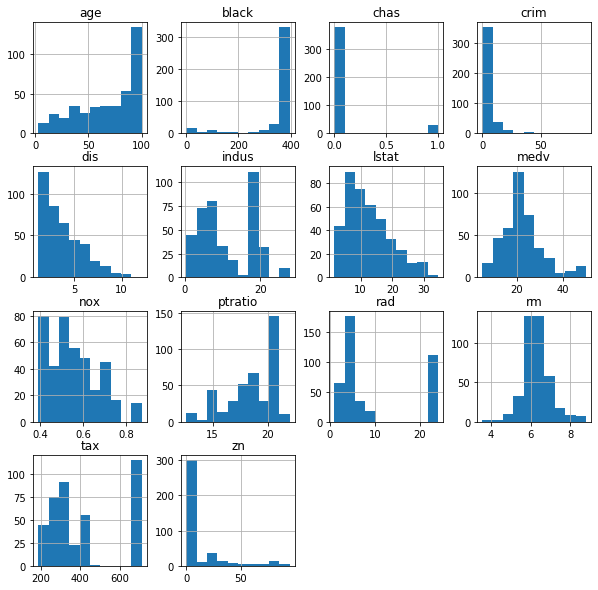

In [6]:
df.hist(figsize=(10,10))
plt.show()

### Inference from Histogram:
* chas is Categorical Variables which are in Encoded format

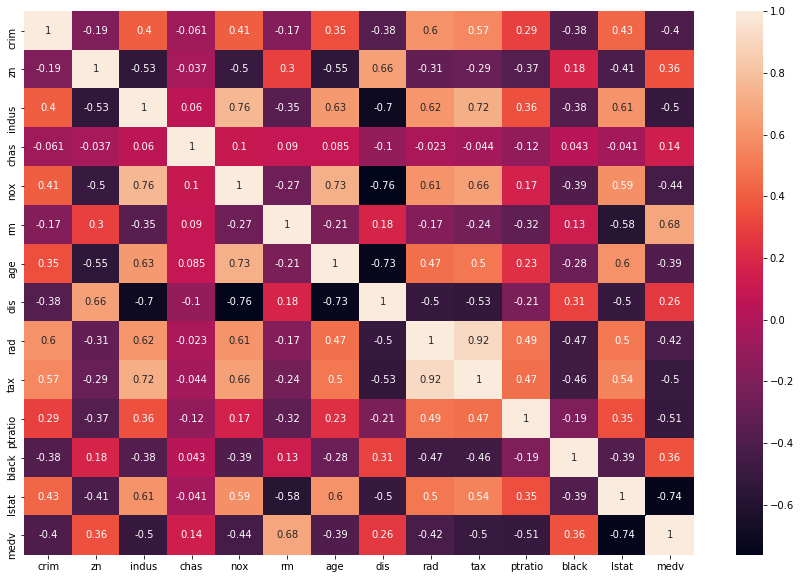

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

### Spliting data 

In [9]:
x = df.drop(['medv'], axis=1)
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


In [10]:
y = df.iloc[:, -1:]
y.head()

,medv
0,21.7
1,19.6
2,20.3
3,15.4
4,20.5


### Split into test and train dataset (70-30 ratio)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
print("Dataset shape:", df.shape)
print("Input Features shape: ", x_train.shape, y_train.shape)
print("Output Features shape: ", x_test.shape, y_test.shape)

Dataset shape: (404, 14)
Input Features shape:  (282, 13) (282, 1)
Output Features shape:  (122, 13) (122, 1)


### Applying Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

#### Fitting model

In [14]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting values

In [17]:
pred = lin.predict(x_test)

#### Finding score

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test, pred)

0.750266989310347

#### Ploting graph for test values

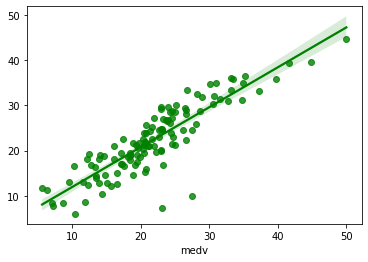

In [20]:
sns.regplot(y_test, pred, color='g')